In [1]:
import gym
import numpy as np
from timeit import default_timer as timer
import pandas as pd
import seaborn as sns
from datetime import timedelta
import matplotlib.pylab as plt
from gym.envs.toy_text.frozen_lake import generate_random_map, FrozenLakeEnv
import random

from util import provide_scores, adjust_data_structure, show_decisions, tsting

4x4
Solved in: 8 episodes and 0:00:00.001910 seconds
Solved in: 16 episodes and 0:00:00.002310 seconds
Solved in: 24 episodes and 0:00:00.004377 seconds
Solved in: 32 episodes and 0:00:00.005171 seconds
Solved in: 40 episodes and 0:00:00.006320 seconds
Solved in: 10 episodes and 0:00:00.001460 seconds
Solved in: 22 episodes and 0:00:00.003271 seconds
Solved in: 34 episodes and 0:00:00.004583 seconds
Solved in: 47 episodes and 0:00:00.006897 seconds
Solved in: 59 episodes and 0:00:00.008440 seconds
Solved in: 17 episodes and 0:00:00.002670 seconds
Solved in: 49 episodes and 0:00:00.006893 seconds
Solved in: 81 episodes and 0:00:00.011810 seconds
Solved in: 113 episodes and 0:00:00.015281 seconds
Solved in: 146 episodes and 0:00:00.021247 seconds
Solved in: 26 episodes and 0:00:00.003563 seconds
Solved in: 75 episodes and 0:00:00.010612 seconds
Solved in: 124 episodes and 0:00:00.017717 seconds
Solved in: 173 episodes and 0:00:00.027893 seconds
Solved in: 222 episodes and 0:00:00.030128 

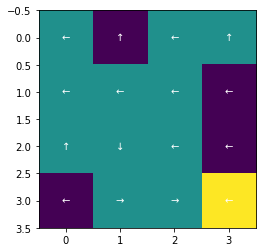

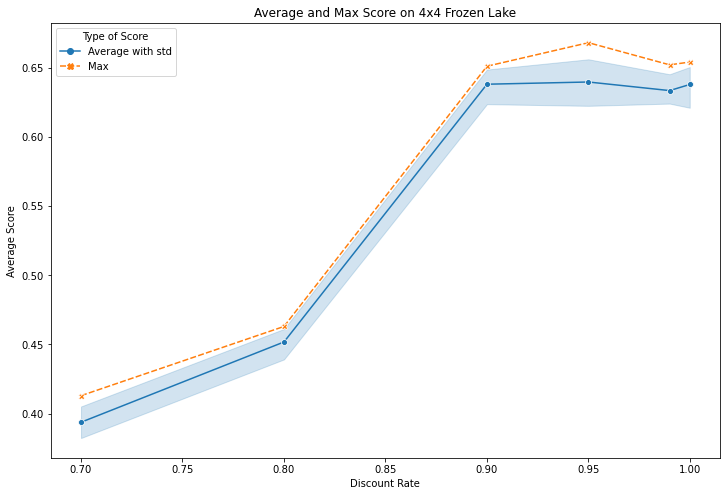

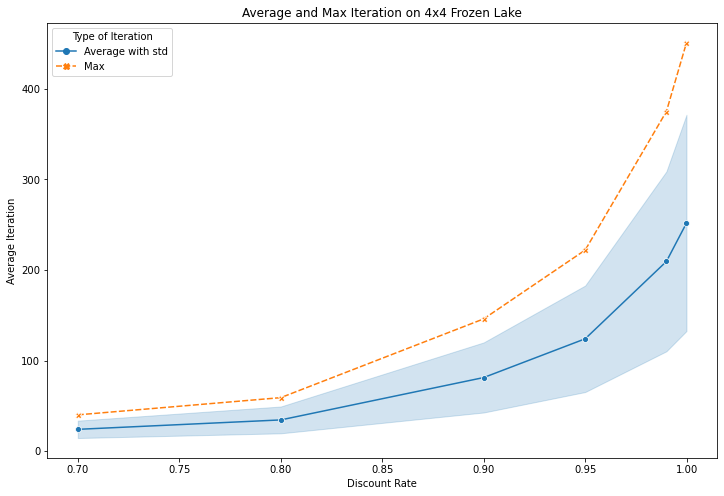

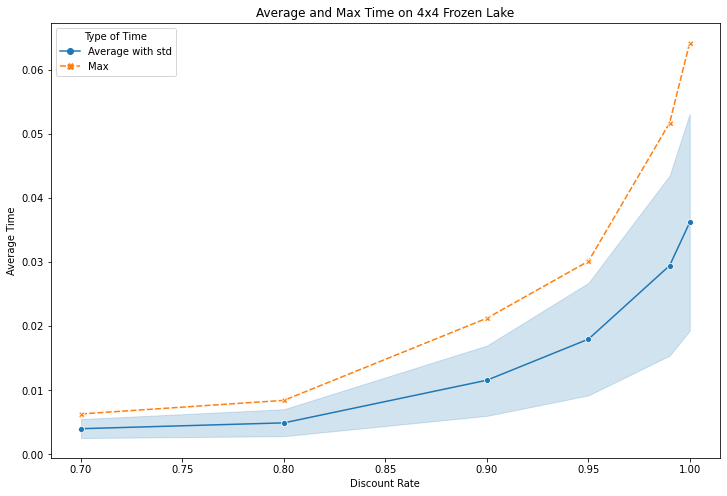

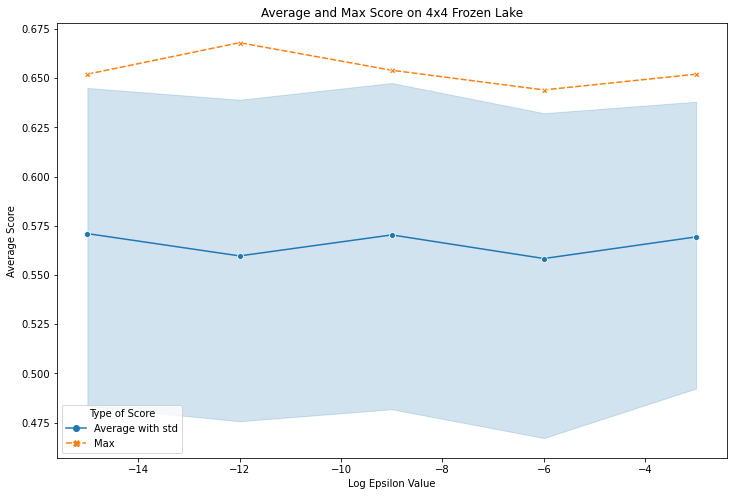

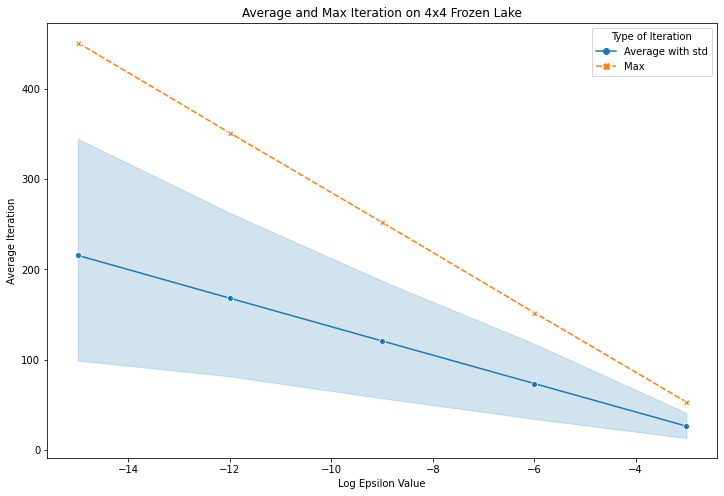

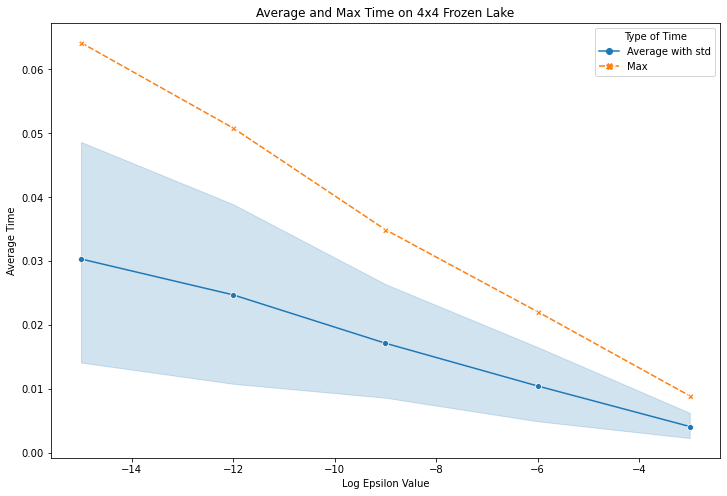

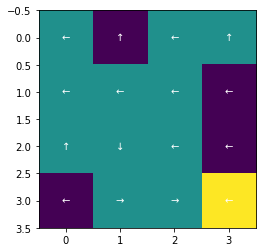

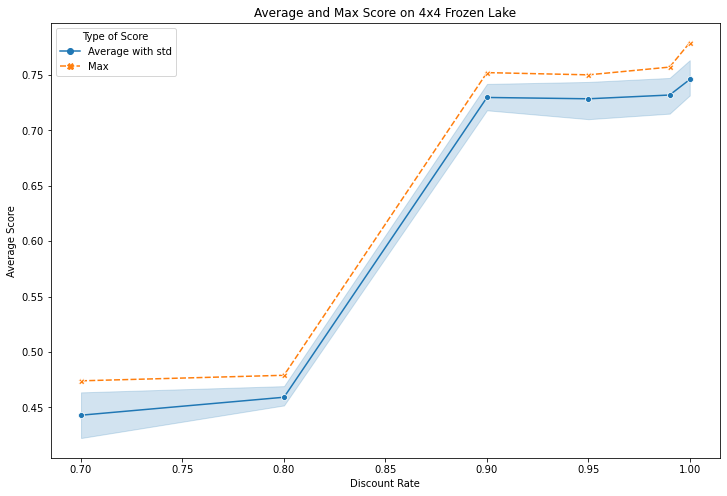

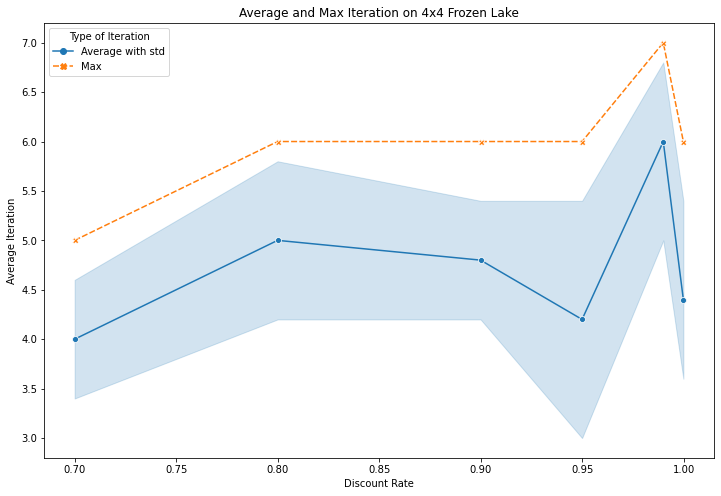

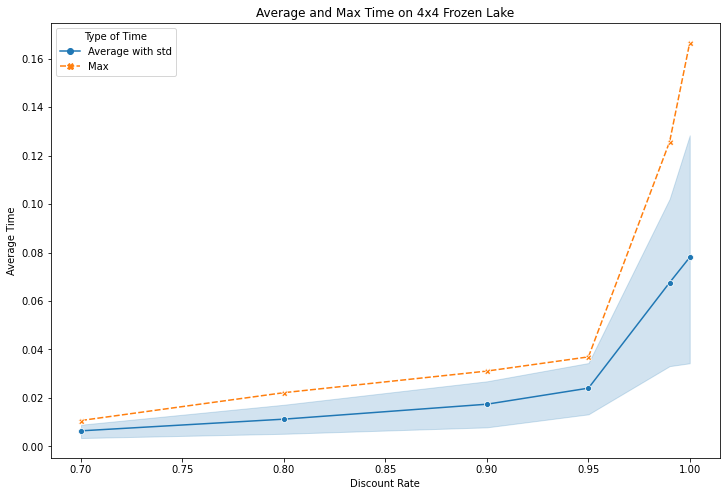

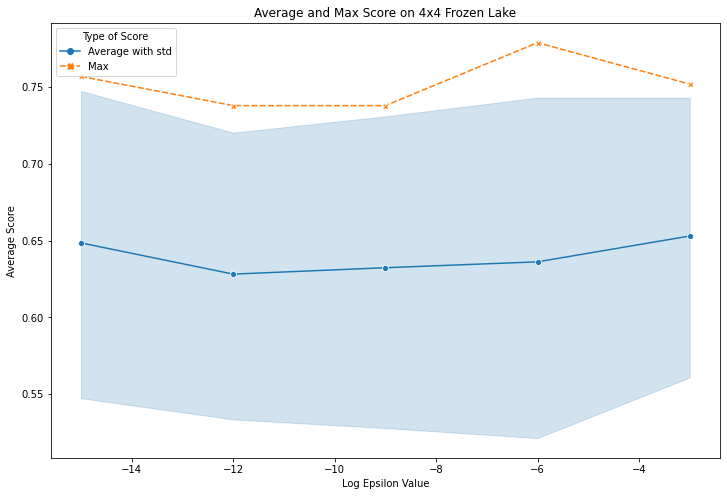

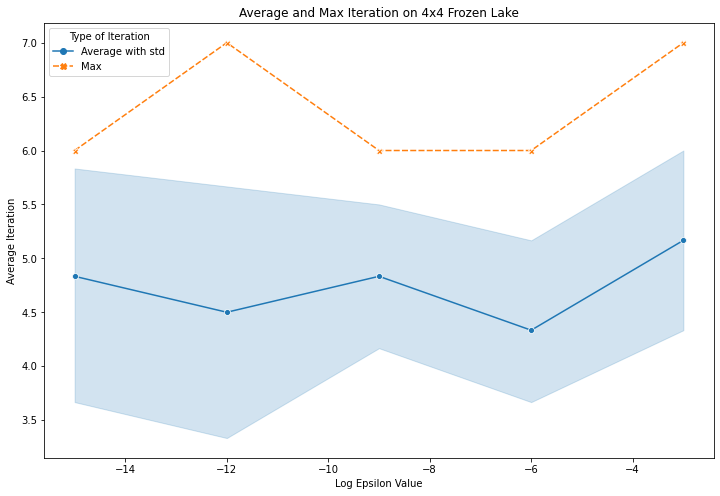

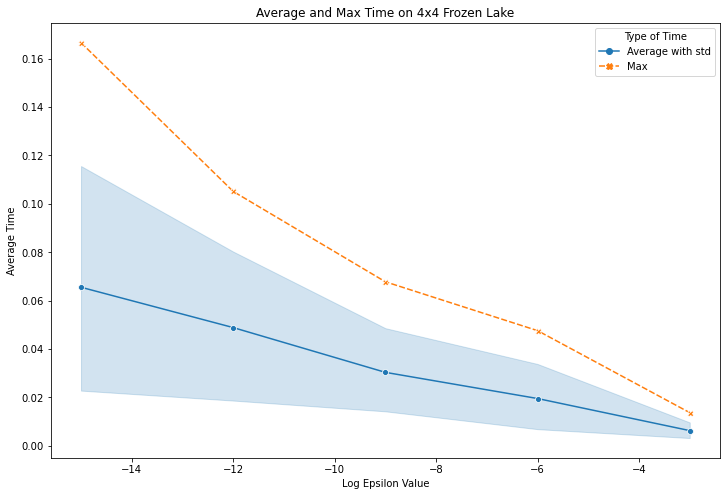

16x16
Solved in: 9 episodes and 0:00:00.015479 seconds
Solved in: 19 episodes and 0:00:00.029457 seconds
Solved in: 30 episodes and 0:00:00.053749 seconds
Solved in: 41 episodes and 0:00:00.066234 seconds
Solved in: 52 episodes and 0:00:00.087696 seconds
Solved in: 12 episodes and 0:00:00.019918 seconds
Solved in: 27 episodes and 0:00:00.046212 seconds
Solved in: 44 episodes and 0:00:00.075159 seconds
Solved in: 60 episodes and 0:00:00.106595 seconds
Solved in: 75 episodes and 0:00:00.134836 seconds
Solved in: 20 episodes and 0:00:00.030982 seconds
Solved in: 50 episodes and 0:00:00.085648 seconds
Solved in: 81 episodes and 0:00:00.137128 seconds
Solved in: 109 episodes and 0:00:00.189193 seconds
Solved in: 137 episodes and 0:00:00.236127 seconds
Solved in: 30 episodes and 0:00:00.049588 seconds
Solved in: 87 episodes and 0:00:00.146697 seconds
Solved in: 137 episodes and 0:00:00.227648 seconds
Solved in: 186 episodes and 0:00:00.305848 seconds
Solved in: 237 episodes and 0:00:00.39090

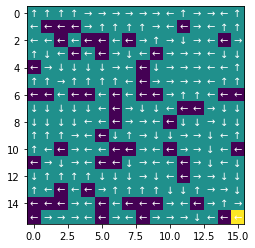

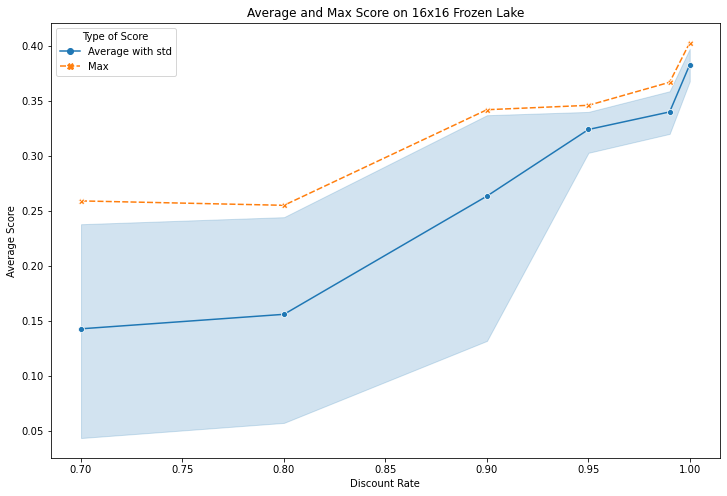

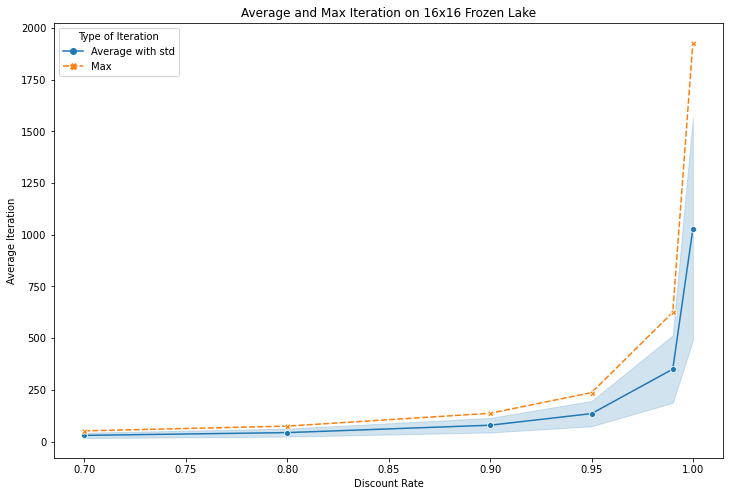

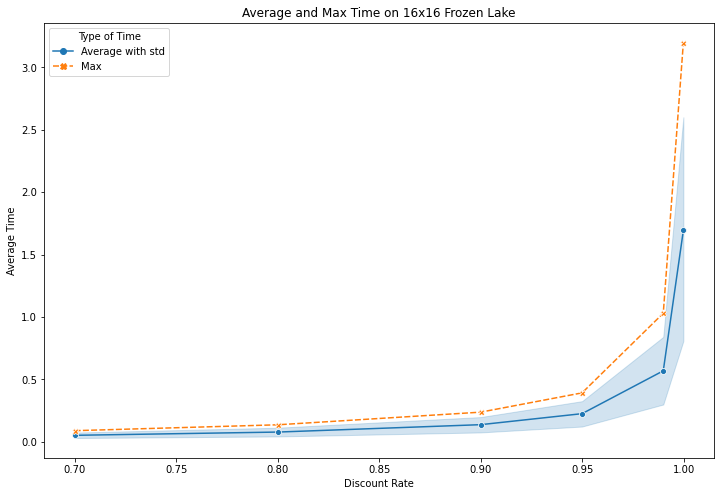

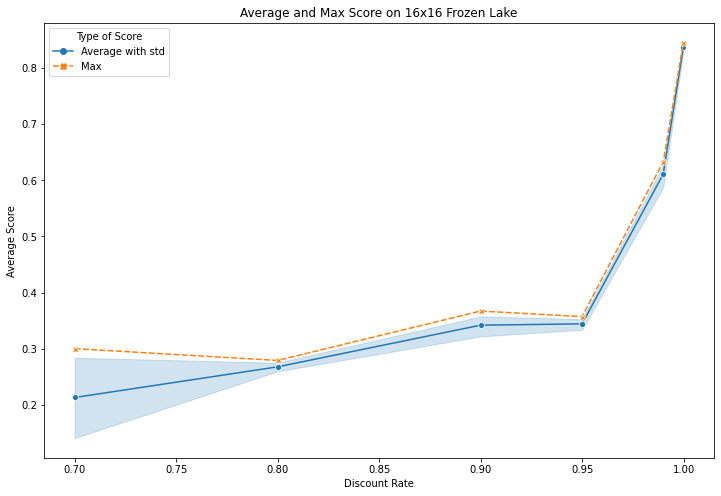

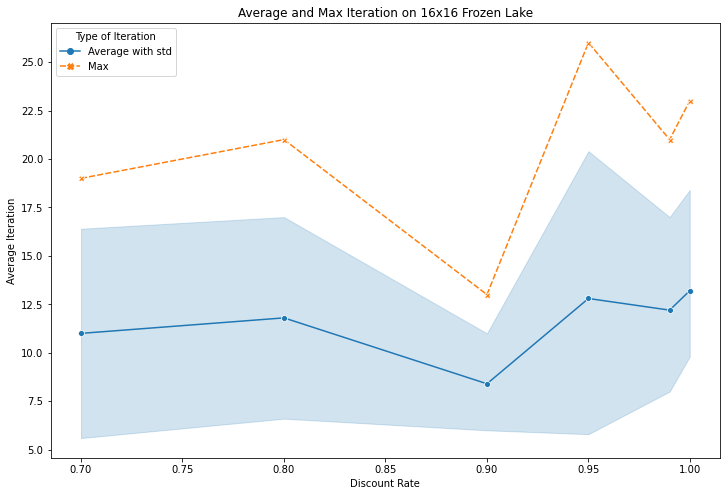

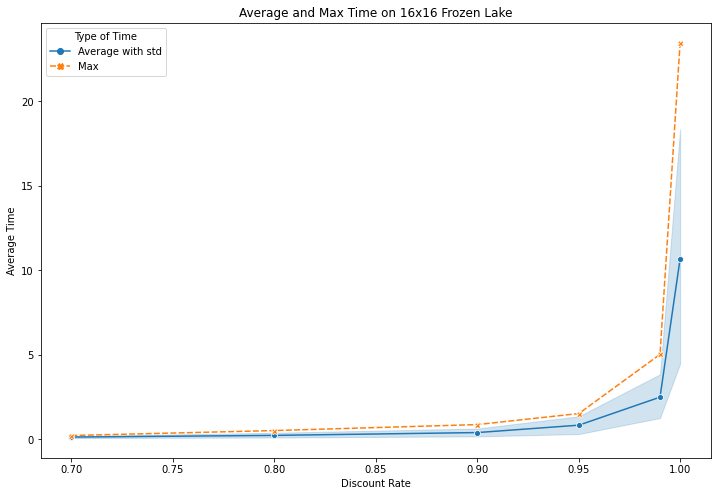

In [9]:
def pi_func_helper(game, v_matrix, gamma, x, y):
    sum_value_prime = 0
    for chance, s_prime, score, complete in game.P[x][y]:
        v_prime_matrix = v_matrix[0][s_prime]
        
        current_score = 0
        if complete:
            current_score = score                     
        else:
            current_score = score + gamma*v_prime_matrix
        sum_value_prime += current_score * chance 

    return complete, sum_value_prime

def vi_func(game, gamma=0.9, epsilon=1e-12):
    
    begin = timer()
    
    algo_array = np.zeros((1, game.observation_space.n))
    v_matrix = np.zeros((1, game.observation_space.n))
    v_prior_matrix = v_matrix.copy()
    iteration = 0
    highest_delta = 1
    while highest_delta > epsilon:
        iteration += 1
        for x in range(game.observation_space.n):
            v_star = -np.inf
            for y in range(game.action_space.n):
                # get new state and its score        
                sum_of_v = 0
                complete, sum_of_v = pi_func_helper(game, v_matrix, gamma, x, y)
                        
                if sum_of_v > v_star:
                    v_star = sum_of_v
                    algo_array[0][x] = y
                    v_matrix[0][x] = v_star
        
        highest_delta = np.max(np.abs(v_matrix - v_prior_matrix))
        v_prior_matrix = v_matrix.copy()
        
    finish = timer()
    seconds_takens = timedelta(seconds=finish-begin)
    print("Solved in: {} episodes and {} seconds".format(iteration, seconds_takens))
    return algo_array[0], iteration, seconds_takens



def pi_func(game, gamma=0.9, epsilon=1e-3):
    covergence = False
    iteration = 0
    begin = timer()
    
    algo_array = np.random.randint(game.action_space.n, size=(1,game.observation_space.n))

    v_matrix = np.zeros((1, game.observation_space.n))

    while not covergence:
        iteration += 1
        complete = True
        while complete:
            num_of_episode = 0
            for x in range(game.observation_space.n):
                
                value = v_matrix[0][x]
                y = algo_array[0][x]
                sum_value_prime = 0

                complete, sum_value_prime = pi_func_helper(game, v_matrix, gamma, x, y)

                v_matrix[0][x] = sum_value_prime
                num_of_episode = max(num_of_episode, np.abs(value-v_matrix[0][x]))
            if num_of_episode < epsilon:
                complete = False


        ## 3
        covergence = True
        for x in range(game.observation_space.n):

            # assign 
            prior_y = algo_array[0][x]
            # get the argmax y here
            highest_v = -np.inf
            for y in range(game.action_space.n):
                # get the new value 
                sum_of_v = 0
                complete, sum_of_v = pi_func_helper(game, v_matrix, gamma, x, y)
                if sum_of_v > highest_v:
                    highest_v = sum_of_v
                    algo_array[0][x] = y

            if prior_y != algo_array[0][x]:
                covergence = False
    
    
    finish = timer()
    seconds_takens = timedelta(seconds=finish-begin)
    print("Solved in: {} episodes and {} seconds".format(iteration, seconds_takens))
    return algo_array[0], iteration, seconds_takens

def run_value_policy_iter_helper(iteration_matrix, gamma_instance, num_of_episode, index, value):
    iteration_matrix[gamma_instance][num_of_episode][index] = value

    return iteration_matrix

def run_value_policy_iter(game, gamma=[0.9], epsilon=[1e-9], verbose=True):
    
    value_iteration_matrix = {}
    
    for gamma_instance in gamma:
        value_iteration_matrix[gamma_instance] = {}
        for num_of_episode in epsilon:
            value_iteration_matrix[gamma_instance][num_of_episode] = {}
            
            
            algorithm_decision, total_num_of_iterations, total_num_of_seconds_taken = vi_func(game, gamma_instance, num_of_episode)
            value_iteration_average_score, value_iteration_average_episodes, tmp1, tmp2 = tsting(game, algorithm_decision)    

            value_iteration_matrix = run_value_policy_iter_helper(value_iteration_matrix, gamma_instance, num_of_episode, "average_score", value_iteration_average_score)
            value_iteration_matrix = run_value_policy_iter_helper(value_iteration_matrix, gamma_instance, num_of_episode, "average_episodes", value_iteration_average_episodes)
            value_iteration_matrix = run_value_policy_iter_helper(value_iteration_matrix, gamma_instance, num_of_episode, "iteration", total_num_of_iterations)
            value_iteration_matrix = run_value_policy_iter_helper(value_iteration_matrix, gamma_instance, num_of_episode, "seconds_takens", total_num_of_seconds_taken)
            value_iteration_matrix = run_value_policy_iter_helper(value_iteration_matrix, gamma_instance, num_of_episode, "policy", algorithm_decision)

    policy_iteration_matrix = {}
    for gamma_instance in gamma:
        policy_iteration_matrix[gamma_instance] = {}
        for num_of_episode in epsilon:
            policy_iteration_matrix[gamma_instance][num_of_episode] = {}

            algorithm_decision, total_num_of_iterations, policy_total_num_of_seconds_taken = pi_func(game, gamma_instance, num_of_episode)
            policy_iteration_average_score, policy_iteration_average_episodes, tmp, tmp2 = tsting(game, algorithm_decision) 

            policy_iteration_matrix = run_value_policy_iter_helper(policy_iteration_matrix, gamma_instance, num_of_episode, "average_score", policy_iteration_average_score)
            policy_iteration_matrix = run_value_policy_iter_helper(policy_iteration_matrix, gamma_instance, num_of_episode, "average_episodes", policy_iteration_average_episodes)
            policy_iteration_matrix = run_value_policy_iter_helper(policy_iteration_matrix, gamma_instance, num_of_episode, "iteration", total_num_of_iterations)
            policy_iteration_matrix = run_value_policy_iter_helper(policy_iteration_matrix, gamma_instance, num_of_episode, "seconds_takens", policy_total_num_of_seconds_taken)
            policy_iteration_matrix = run_value_policy_iter_helper(policy_iteration_matrix, gamma_instance, num_of_episode, "policy", algorithm_decision)

    
    return value_iteration_matrix, policy_iteration_matrix

    
def draw_figure(dictionary, score="Score", size=4, variable="Discount Rate", verbose=False):

    plt.figure(figsize=(12, 8))
    title = "Average and Max {} on {}x{} Frozen Lake".format(score, size, size)
    index_of_data = "Type of {}".format(score)
    score = "Average {}".format(score)
    figure_data = pd.DataFrame(columns=[variable, score, index_of_data])
    plt.title(title)
    for dict_key_index, value in dictionary.items():
        for i in value:
            if not verbose:
                matrix = {variable: dict_key_index, score: float(i), index_of_data: "Average with std"}
            else:
                matrix = {variable: np.log10(dict_key_index), score: float(i), index_of_data: "Average with std"}                
            figure_data = figure_data.append(matrix, ignore_index=True)
        if not verbose:
            matrix = {variable: dict_key_index, score: float(max(value)), index_of_data: "Max"}
        else:
            matrix = {variable: np.log10(dict_key_index), score: float(max(value)), index_of_data: "Max"}
        figure_data = figure_data.append(matrix, ignore_index=True)
    sns.lineplot(x=variable, y=score, hue=index_of_data, style=index_of_data, markers=True, data=figure_data).set(title=title)
    plt.savefig(title)
    plt.show()

def draw_fig_call_function1(iteration_results):
    draw_figure(iteration_results[0], score="Score", size=4)
    
    draw_figure(iteration_results[1], score="Iteration", size=4)
    
    draw_figure(iteration_results[2], score="Time", size=4)
    
    draw_figure(iteration_results[3], score="Score", size=4, variable="Log Epsilon Value", verbose=True)
    
    draw_figure(iteration_results[4], score="Iteration", size=4, variable="Log Epsilon Value", verbose=True)
    
    draw_figure(iteration_results[5], score="Time", size=4, variable="Log Epsilon Value", verbose=True)

def draw_fig_call_function2(iteration_results):
    draw_figure(iteration_results[0], score="Score", size=16)
    
    draw_figure(iteration_results[1], score="Iteration", size=16)
    
    draw_figure(iteration_results[2], score="Time", size=16)

    
def data_structure(matrix):
    
    # return for gamma
    gamma_scores = {}
    gamma_episodes = {}
    gamma_length = {}


    for gam in matrix:
        gamma_scores[gam] = []    
        gamma_episodes[gam] = []    
        gamma_length[gam] = []

        for num_of_episode in matrix[gam]:
            gamma_scores[gam].append(matrix[gam][num_of_episode]['average_score'])
            gamma_episodes[gam].append(matrix[gam][num_of_episode]['iteration'])        
            gamma_length[gam].append(matrix[gam][num_of_episode]['seconds_takens'].total_seconds())  

            
    lowest_change_scores = {}
    lowest_change_episodes = {}
    lowest_change_length = {}
    for num_of_episode in matrix[0.99]:
        lowest_change_scores[num_of_episode] = []    
        lowest_change_episodes[num_of_episode] = []    
        lowest_change_length[num_of_episode] = []
    
        for gam in value_iteration_matrix:
            lowest_change_scores[num_of_episode].append(matrix[gam][num_of_episode]['average_score'])
            lowest_change_episodes[num_of_episode].append(matrix[gam][num_of_episode]['iteration'])        
            lowest_change_length[num_of_episode].append(matrix[gam][num_of_episode]['seconds_takens'].total_seconds()) 
            
    return gamma_scores, gamma_episodes, gamma_length, lowest_change_scores, lowest_change_episodes, lowest_change_length


if __name__ == "__main__":
    np.random.seed(42)
    four = generate_random_map(4)
    sixteen = generate_random_map(16)
    originial_static_grid = {
        "4x4": four,
        "16x16": sixteen
    }
    
    print("4x4")

    gamma=[0.7, 0.8, 0.9, 0.95, 0.99, 0.9999]
    epsilon=[1e-3, 1e-6, 1e-9, 1e-12, 1e-15]
    
    game = gym.make("FrozenLake-v1")
    value_iteration_matrix, policy_iteration_matrix = run_value_policy_iter(game, gamma=gamma, epsilon=epsilon, verbose=True)
    #value_iteration_matrix, policy_iteration_matrix = run_value_policy_iter(game, verbose=True)
    
    print(f'Value Iteration: \n {value_iteration_matrix[0.99]}')
    print(f'Policy Iteration: \n {policy_iteration_matrix[0.9999]}')
    #decisions = value_iteration_matrix[0.9][1e-9]['policy']
    decisions = value_iteration_matrix[0.99][1e-12]['policy']
    value_iteration_results = data_structure(value_iteration_matrix)
    show_decisions(4, decisions, originial_static_grid, "4x4")

    draw_fig_call_function1(value_iteration_results)

    policy_iteration_results = data_structure(policy_iteration_matrix)
    show_decisions(4, decisions, originial_static_grid, "4x4")

    draw_fig_call_function1(policy_iteration_results)
    
    
    
    print("16x16")
    
    game = FrozenLakeEnv(desc=originial_static_grid["16x16"])
    value_iteration_matrix, policy_iteration_matrix = run_value_policy_iter(game, gamma=gamma, epsilon=epsilon, verbose=True)
    
    #decisions = value_iteration_matrix[0.9][1e-9]['policy']
    decisions = value_iteration_matrix[0.9999][1e-15]['policy']
    value_iteration_results = data_structure(value_iteration_matrix)
    show_decisions(16, decisions, originial_static_grid, "16x16")

    draw_fig_call_function2(value_iteration_results)

    policy_iteration_results = data_structure(policy_iteration_matrix)

    draw_fig_call_function2(policy_iteration_results)